In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics as mt
import calendar
import warnings
warnings.filterwarnings("ignore")

In [2]:
def procesar_csv(df):
    from sklearn import preprocessing
    
    # Convertirmos las columnas origin y destination a variables numericas 
    le = preprocessing.LabelEncoder()
    ciudades = ((pd.concat([df['origin'], df['destination']], ignore_index = True).drop_duplicates()).reset_index())[0]
    le.fit(ciudades)
    
    origin_as_int = le.fit_transform(df['origin'])
    destination_as_int = le.fit_transform(df["destination"])
    
    df["origin_int"] = origin_as_int
    df.drop('origin', axis=1, inplace=True)
    
    df["destination_int"] = destination_as_int
    df.drop('destination', axis=1, inplace=True)

    # Transformamos Columnas Continuas a Discretas
    revenues_usd_discr = pd.qcut(df["revenues_usd"], 10, [1,2,3,4,5,6,7,8,9,10] )
    df["revenues_usd_discr"] = revenues_usd_discr
    df.drop('revenues_usd', axis=1, inplace=True)
    
    # Cambiamos el formato del date y departure_time para saber el mes de la compra y el horario en el que se compra
    df["date"] = pd.to_datetime(df["date"], errors='coerce')
    df["mes"] = pd.DatetimeIndex(df["date"]).month
    
    df.departure_time = pd.to_datetime(df.departure_time, errors='coerce')
    bins = [0,12,18,24]
    labels = ["Mañana","Tarde","Noche"]
    le.fit(labels)
    df["hora"] = pd.DatetimeIndex(df["departure_time"]).hour
    #df['horario'] = pd.cut(df["departure_time"].dt.hour, bins, labels=labels, right=False)
    #df['horario'] = le.fit_transform(df["horario"])
    df.drop('departure_time', axis=1, inplace=True)
    df.drop('date', axis=1, inplace=True)
    
    le.fit(df["fligth_number"])
    df["fligth_number"] = le.fit_transform(df["fligth_number"])

    
    # Eliminar columnas sin uso
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # retornamos el data frame modificado sin valore nulos.
    return df.dropna()

In [3]:
# Leemos los datos
df = pd.read_csv("ALUMNOS-trainData.csv")
df_procesado = df.copy()

# transformamos los datos a binarios
df_procesado["Labels"] = np.where(df_procesado["noshow"] >= 4, 1,0)

# Procesamos los datos con la funcion procesar_csv()
df_procesado = procesar_csv(df_procesado)

# Definimos nuestra columna target
target = df_procesado['Labels']

# La eliminamos del dataframe
df_procesado.drop('noshow', axis=1, inplace=True)
df_procesado.drop('Labels', axis=1, inplace=True)

In [4]:
df_procesado.columns

Index(['fligth_number', 'distance', 'denied_boarding', 'pax_midlow',
       'pax_high', 'pax_midhigh', 'pax_low', 'pax_freqflyer', 'group_bookings',
       'out_of_stock', 'dom_cnx', 'int_cnx', 'p2p', 'capacity', 'bookings',
       'origin_int', 'destination_int', 'revenues_usd_discr', 'mes', 'hora'],
      dtype='object')

,fligth_number
3789,1729
3784,1700
3436,1690
3437,1682
3591,1682
...,...
2878,1
3102,1
3353,1
2497,1


<AxesSubplot:title={'center':'fligth_number'}>

,distance
366,33768
586,30177
1106,18317
873,16216
1225,14991
...,...
4785,1
395,1
1437,1
249,1


<AxesSubplot:title={'center':'distance'}>

,denied_boarding
0,984720
1,3822
2,3278
3,1782
4,1566
5,886
6,763
7,470
8,346
9,191


<AxesSubplot:title={'center':'denied_boarding'}>

,pax_midlow
0,33891
1,14774
2,13992
3,10470
85,10193
...,...
307,1
293,1
295,1
303,1


<AxesSubplot:title={'center':'pax_midlow'}>

,pax_high
0,395069
1,135807
2,103279
3,66656
4,53110
...,...
137,1
167,1
145,1
132,1


<AxesSubplot:title={'center':'pax_high'}>

,pax_midhigh
0,290008
1,110794
2,88901
3,67798
4,56664
...,...
154,1
182,1
141,1
147,1


<AxesSubplot:title={'center':'pax_midhigh'}>

,pax_low
0,94306
51,10214
54,10146
49,10117
57,10104
...,...
285,1
267,1
272,1
274,1


<AxesSubplot:title={'center':'pax_low'}>

,pax_freqflyer
8,40400
7,40358
6,40339
9,40292
10,39196
...,...
236,1
210,1
230,1
216,1


<AxesSubplot:title={'center':'pax_freqflyer'}>

,group_bookings
0,832218
1,11335
2,8394
10,7948
20,5736
...,...
193,1
205,1
187,1
228,1


<AxesSubplot:title={'center':'group_bookings'}>

,out_of_stock
0,902254
1,96218


<AxesSubplot:title={'center':'out_of_stock'}>

,dom_cnx
0,286334
1,29963
2,26797
3,21540
4,20672
...,...
242,1
209,1
219,1
246,1


<AxesSubplot:title={'center':'dom_cnx'}>

,int_cnx
0,263705
1,66009
2,62270
3,42354
4,38385
...,...
316,1
310,1
333,1
357,1


<AxesSubplot:title={'center':'int_cnx'}>

,p2p
0,32715
82,6582
81,6493
83,6485
87,6471
...,...
401,1
519,1
490,1
395,1


<AxesSubplot:title={'center':'p2p'}>

,capacity
174.000000,402063
144.000000,199905
220.000000,116525
168.000000,67504
218.000000,49406
...,...
269.000000,1
66.000000,1
299.000000,1
292.000000,1


<AxesSubplot:title={'center':'capacity'}>

,bookings
138,6397
129,6333
131,6321
126,6304
128,6269
...,...
571,1
554,1
573,1
574,1


<AxesSubplot:title={'center':'bookings'}>

,origin_int
122,94089
79,91877
52,86472
27,77450
21,57901
...,...
74,38
106,31
95,31
137,10


<AxesSubplot:title={'center':'origin_int'}>

,destination_int
125,94575
81,91578
54,86397
27,77330
21,58162
...,...
76,31
149,10
140,9
118,1


<AxesSubplot:title={'center':'destination_int'}>

,revenues_usd_discr
9,99913
10,99898
4,99889
6,99888
5,99881
7,99877
3,99875
8,99870
2,99836
1,99545


<AxesSubplot:title={'center':'revenues_usd_discr'}>

,mes
1,99822
7,96566
12,92746
10,92291
11,89482
9,87308
6,84225
5,80616
3,72287
2,69694


<AxesSubplot:title={'center':'mes'}>

,hora
8.0,65554
19.0,60698
12.0,60107
15.0,57241
10.0,56923
17.0,56023
9.0,53732
18.0,53290
20.0,53051
7.0,52256


<AxesSubplot:title={'center':'hora'}>

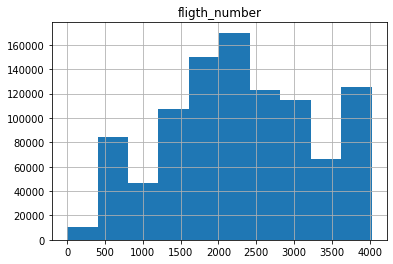

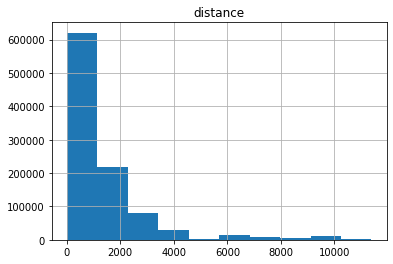

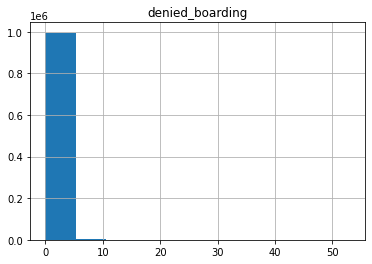

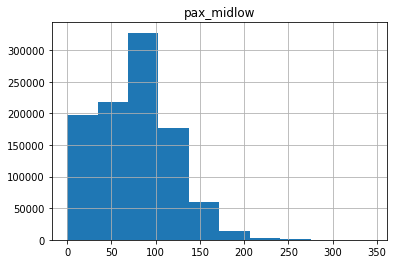

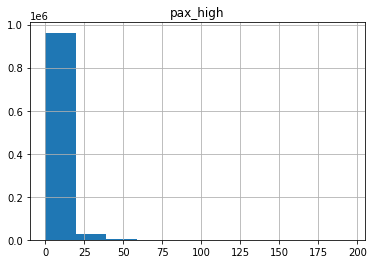

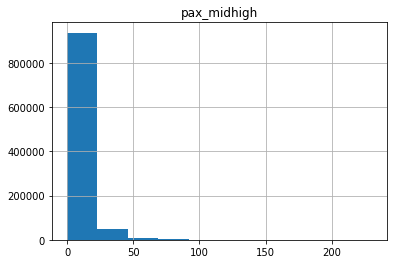

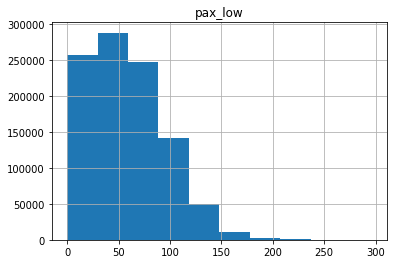

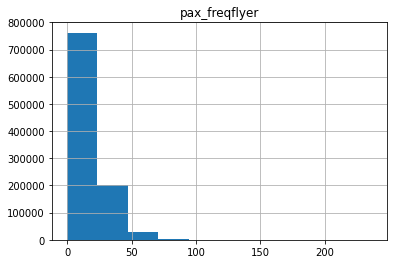

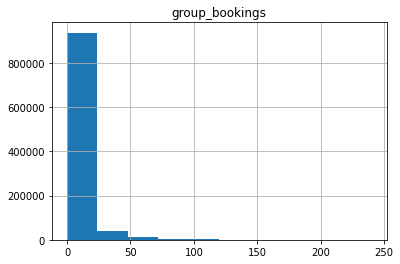

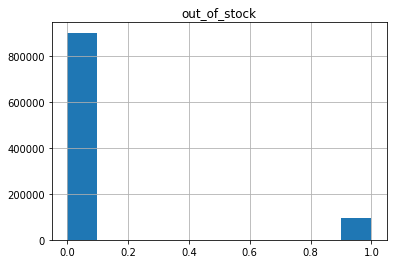

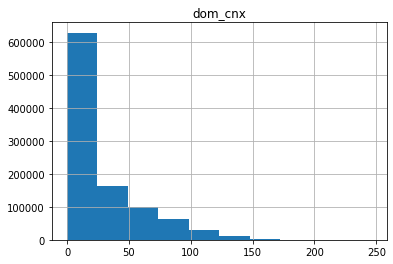

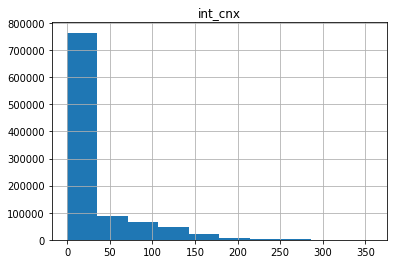

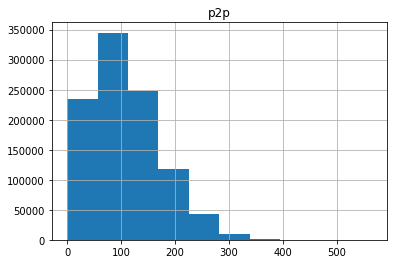

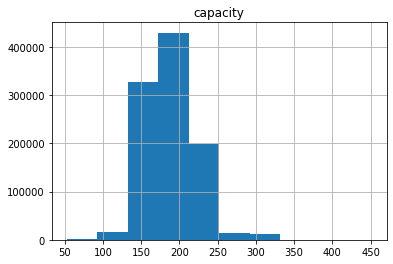

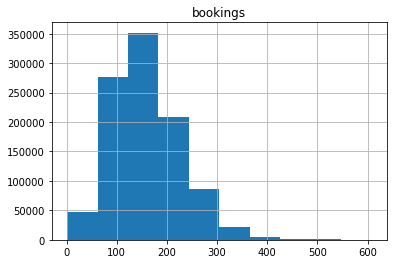

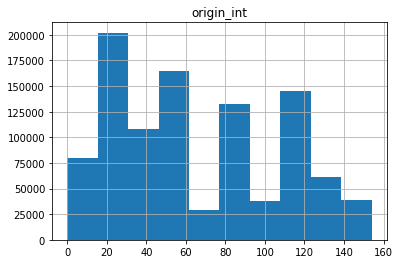

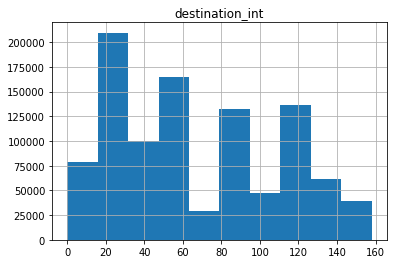

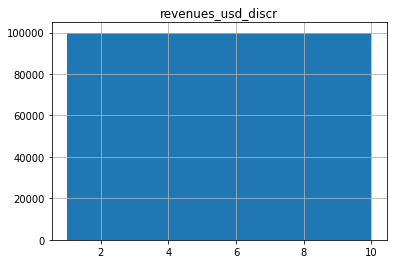

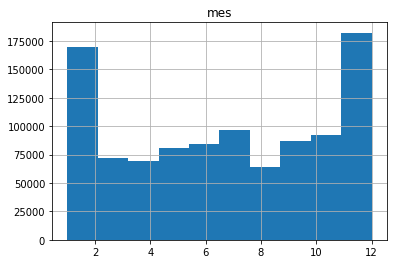

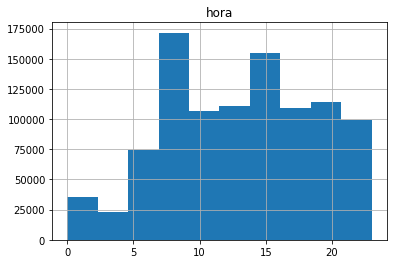

In [5]:
for i in df_procesado.columns:
    plt.figure()
    plt.title(i)
    display(pd.DataFrame(df_procesado[i].value_counts()), df_procesado[i].hist())

,0,1,2,3
0,"AxesSubplot(0.125,0.758226;0.158163x0.121774)","AxesSubplot(0.330612,0.758226;0.158163x0.121774)","AxesSubplot(0.536224,0.758226;0.158163x0.121774)","AxesSubplot(0.741837,0.758226;0.158163x0.121774)"
1,"AxesSubplot(0.125,0.599919;0.158163x0.121774)","AxesSubplot(0.330612,0.599919;0.158163x0.121774)","AxesSubplot(0.536224,0.599919;0.158163x0.121774)","AxesSubplot(0.741837,0.599919;0.158163x0.121774)"
2,"AxesSubplot(0.125,0.441613;0.158163x0.121774)","AxesSubplot(0.330612,0.441613;0.158163x0.121774)","AxesSubplot(0.536224,0.441613;0.158163x0.121774)","AxesSubplot(0.741837,0.441613;0.158163x0.121774)"
3,"AxesSubplot(0.125,0.283306;0.158163x0.121774)","AxesSubplot(0.330612,0.283306;0.158163x0.121774)","AxesSubplot(0.536224,0.283306;0.158163x0.121774)","AxesSubplot(0.741837,0.283306;0.158163x0.121774)"
4,"AxesSubplot(0.125,0.125;0.158163x0.121774)","AxesSubplot(0.330612,0.125;0.158163x0.121774)","AxesSubplot(0.536224,0.125;0.158163x0.121774)","AxesSubplot(0.741837,0.125;0.158163x0.121774)"


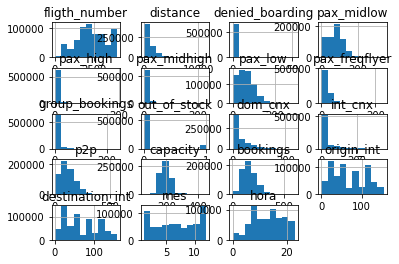

In [6]:
display(pd.DataFrame(df_procesado[target==1].hist()))

In [7]:
df_procesado.drop('out_of_stock', axis=1, inplace=True)
display(df_procesado)


,fligth_number,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,dom_cnx,int_cnx,p2p,capacity,bookings,origin_int,destination_int,revenues_usd_discr,mes,hora
0,3799,1394,0,94,2,28,94,22,19,1,0,239,174.0,240,12,125,6,11,10.0
1,2869,489,0,100,4,4,87,25,0,19,9,192,174.0,220,79,143,2,5,19.0
2,3776,2180,0,7,1,5,64,2,0,0,10,69,218.0,79,122,116,8,5,9.0
3,2267,524,0,54,4,7,21,4,0,26,0,64,174.0,90,27,33,6,2,21.0
4,3051,1170,0,21,88,18,82,0,88,23,3,183,144.0,209,51,55,8,10,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,2252,552,0,25,12,20,4,12,0,64,9,0,144.0,73,143,27,8,10,15.0
999886,2567,3934,0,129,3,19,121,2,20,0,118,156,168.0,274,79,57,10,5,8.0
999887,3886,1430,0,2,1,0,108,20,36,7,0,124,218.0,131,62,125,7,4,14.0
999888,3045,1091,0,67,2,7,42,16,0,34,2,98,144.0,134,53,126,5,4,8.0


In [8]:
df_procesado.dtypes
df_procesado.denied_boarding.unique()
pd.DataFrame(target)



,Labels
0,1
1,0
2,1
3,1
4,1
...,...
999885,1
999886,1
999887,1
999888,0


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Crear un objeto de KFold cross validation

#for k in range (2,100, 5):
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

#Crear arreglos para guardar los errores de cada fold (tanto para entrenamiento como test).
F1Train = np.zeros(10)
F1Test = np.zeros(10)

LR = LogisticRegression(max_iter = 2000)
i=0

#Aplicar K-fold cross validation
for train_index, test_index in kf.split(df_procesado):
        #extraer los datos de entrenamiento y test
        trainData = df_procesado.iloc[train_index, :]
        testData = df_procesado.iloc[test_index, :]

        trainLabel = target.iloc[train_index]
        testLabel = target.iloc[test_index]

        #Entrenar el modelo usando los datos de entrenamiento
        LR = LR.fit(trainData, trainLabel)
        
        #Predecir los valores de TrainData y calcule su error
        prediccion = LR.predict(trainData)
        F1Train[i] = mt.f1_score(trainLabel, prediccion, pos_label = 0)
    
        #Prediga los valores de testData y calcule su error
        prediccion = LR.predict(testData)
        F1Test[i] = mt.f1_score(testLabel, prediccion, pos_label = 0)

        i+=1

        print(i, end = " ")
print("\nF1-score modelo para training: ", F1Train.mean(), "+-", F1Train.std())   
print("F1-score modelo para test: ", F1Test.mean(), "+-", F1Test.std())  

#Dado que el F1 score es una medida de evaluacion que unifica tanto la precision como el recall se puede analizar que a mayor valor de F1 score
# se considerara que sera un modelo capaz de hacer una prediccion mas precisa.
# En este caso, se considera que Logistic Regression no es el mejor modelo predictivo


1 2 3 4 5 6 7 8 9 10 
F1-score modelo para training:  0.1354055477027374 +- 0.009303797041267737
F1-score modelo para test:  0.13549291517223544 +- 0.009770504869464184


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

LR = LogisticRegression(penalty = "l2",C =1.0, max_iter = 2000)


X_train, X_test, y_train, y_test = train_test_split(df_procesado,target, train_size=0.8)
#display(X_train)
#display(y_train)
#display(X_test)
#display(y_test)

LR.fit(X_train,y_train)
#display(X_test)

#Aplicando el modelo a otros datos
resultado=LR.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

#Aplicando el modelo a otros datos
resultado=LR.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado[:10])

#Analizando los parámetros aprendidos
print("\nAccuracy:",sum(LR.predict(X_test)==y_test)/len(y_test))

#Analizando los parámetros aprendidos
print("\nParametros:",LR.coef_,"\nIntercepto",LR.intercept_)



Resultado de la predicción:
 [1 1 1 ... 1 1 1]
Resultado original:
 856498    1
142084    1
33774     1
685063    0
838111    0
         ..
39627     0
767962    1
142292    1
576745    0
137645    1
Name: Labels, Length: 199695, dtype: int32
Resultado de la predicción:
 [[0.41680295 0.58319705]
 [0.29377992 0.70622008]
 [0.38738887 0.61261113]
 [0.45464205 0.54535795]
 [0.39651468 0.60348532]
 [0.35308116 0.64691884]
 [0.38396416 0.61603584]
 [0.25490693 0.74509307]
 [0.50771322 0.49228678]
 [0.46905076 0.53094924]]

Accuracy: 0.659600891359323

Parametros: [[ 1.37304459e-04  4.53873359e-06 -2.63033160e-01 -4.74682248e-03
   6.21950763e-03  6.72021564e-04 -3.64430589e-04  7.34815208e-04
  -1.40043338e-02  9.61787980e-04 -1.66952801e-03  3.22283136e-03
   4.35109150e-03  2.51509133e-03  1.60776993e-03 -1.22835619e-03
  -1.78086729e-02  7.41433336e-04 -1.92803467e-02]] 
Intercepto [-0.39974848]


In [12]:
y_pred = LR.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import (confusion_matrix, accuracy_score)
#prediccion=probModelo>0.5

# matriz de confusion
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy del modelo
print('Test accuracy = ', accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))

Confusion Matrix : 
 [[  5281  63674]
 [  4302 126438]]
Test accuracy =  0.659600891359323
              precision    recall  f1-score   support

           0       0.55      0.08      0.13     68955
           1       0.67      0.97      0.79    130740

    accuracy                           0.66    199695
   macro avg       0.61      0.52      0.46    199695
weighted avg       0.63      0.66      0.56    199695



Se realizo un modelado utilizando K-fold = 10 para el Logistic Regresion y se calculo su f1 score.
Por otro lado, se programo este modelo utilzando Sklearn y posteriormente se utilizo classification_report para poder observar el f1 score obtenido.
##
Dado que en ambos casos se obtuvo un f1 score aproximadamente igual, demuestra consistencia en los resultados. Por lo que se considera que el modelo fue realizado correctamente.
